<a href="https://colab.research.google.com/github/Andersonof30/P-Matd40/blob/main/Projeto_Matd40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sweetviz 
import sweetviz

In [20]:
import math
import pandas as pd


In [21]:
nasa = pd.read_csv("nasa1.csv", sep = " ")


In [ ]:
pd.DataFrame.head(nasa)

,am,dmin,dmax,rv,md,ou,moi,jti,eo,ecc,sma,inc,anl,op,pd,pa,ad,pt,ma,mm,haz
1,21.6,0.127220,0.284472,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
2,21.3,0.146068,0.326618,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
3,20.3,0.231502,0.517654,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
4,27.4,0.008801,0.019681,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
5,21.6,0.127220,0.284472,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [ ]:
eda = sweetviz.compare_intra(nasa,nasa['haz'] == 0, ['n', 's'])


In [ ]:
eda.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Modelagem 


In [6]:
import sklearn 
from sklearn.model_selection import train_test_split

Fazendo divisão treino e teste


In [22]:
Xtreino, Xteste, Ytreino, Yteste = train_test_split(nasa.iloc[:,0:20], 
                                                    nasa['haz'], 
                                                    test_size = 0.3)

In [ ]:
Xtreino.head()

,am,dmin,dmax,rv,md,ou,moi,jti,eo,ecc,sma,inc,anl,op,pd,pa,ad,pt,ma,mm
2792,25.4,0.022108,0.049436,14.735017,0.004651,7,0.000093,7.726,2458000.5,0.564932,0.732106,2.982160,320.109648,228.801612,0.318516,330.880404,1.145696,2.458044e+06,291.940853,1.573415
1683,25.0,0.026580,0.059435,7.446504,0.321681,6,0.022160,5.778,2458000.5,0.243754,1.061221,2.864333,123.440354,399.307223,0.802544,114.427575,1.319898,2.457906e+06,84.949204,0.901561
4612,23.8,0.046191,0.103286,28.376660,0.058620,9,0.029873,3.160,2457552.5,0.837997,2.107909,5.538720,117.757705,1117.830910,0.341487,262.672260,3.874331,2.457599e+06,345.149622,0.322052
2207,23.1,0.063761,0.142574,15.902893,0.427483,4,0.145097,5.042,2458000.5,0.148255,1.248409,25.622761,158.620568,509.487744,1.063327,61.907815,1.433491,2.457799e+06,142.588067,0.706592
293,18.0,0.667659,1.492932,15.978699,0.305982,1,0.130923,4.138,2458000.5,0.576100,1.605904,8.687526,252.174760,743.323311,0.680742,200.482142,2.531066,2.457875e+06,60.854071,0.484311


Fazendo a Padronização das variaveis

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtreino = sc.fit_transform(Xtreino)
Xteste = sc.transform(Xteste)

Ajustando a Regressão Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt  

# Ajustando o modelo de Regressão Logística
reglog = LogisticRegression()
reglog.fit(Xtreino, Ytreino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Calculando acuracia

In [ ]:
from sklearn.metrics import accuracy_score

preditos_treino = reglog.predict(Xtreino)
preditos_teste = reglog.predict(Xteste)

acc_treino = accuracy_score(preditos_treino, Ytreino)
acc_teste = accuracy_score(preditos_teste, Yteste)

print('A Acurácia de TREINO foi: {:.2f}%'.format(100*acc_treino))
print('A Acurácia de TESTE foi:  {:.2f}%'.format(100*acc_teste))

A Acurácia de TREINO foi: 95.53%
A Acurácia de TESTE foi:  95.61%


In [ ]:

def Modelagem(k):

    #Treinando o Modelo
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xtreino, Ytreino)

    #Verificando o ACC
    from sklearn.metrics import accuracy_score 
    preditos_teste = knn.predict(Xteste)
    acc_teste = accuracy_score(preditos_teste, Yteste)
    
    return acc_teste

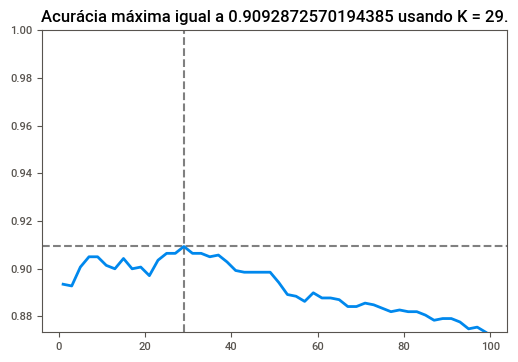

In [ ]:
import numpy as np
kas = np.arange(1, 100, 2)
kas
accs = []

for i in kas:
    accs.append(Modelagem(i))

accs
import matplotlib.pyplot as plt

#Qual é o valor de K que atinge o máximo da acurácia?
kmax = kas[accs.index(max(accs))]


plt.axvline(kmax, color = 'gray', linestyle = 'dashed')
plt.axhline(max(accs), color = 'gray', linestyle = 'dashed')

plt.plot(kas, accs, linewidth = 2)
plt.ylim(min(accs), 1)
frase = 'Acurácia máxima igual a {} usando K = {}.'.format(max(accs), kmax)
plt.title(frase)
plt.show()

In [ ]:
#Treinando o Modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree

arvore = DecisionTreeClassifier(max_depth = 2)
arvore.fit(Xtreino, Ytreino)

#Verificando o ACC
from sklearn.metrics import accuracy_score 

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)
acc_treino = accuracy_score(preditos_treino, Ytreino)
acc_teste = accuracy_score(preditos_teste, Yteste)
    
print('A Acurácia de TREINO foi: {:.2f}%'.format(100*acc_treino))
print('A Acurácia de TESTE foi:  {:.2f}%'.format(100*acc_teste))

A Acurácia de TREINO foi: 99.57%
A Acurácia de TESTE foi:  99.50%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() 
rf.fit(Xtreino, Ytreino)

preditos_rf = rf.predict(Xteste)

acc_rf = accuracy_score(preditos_rf, Yteste) 
    
print('A Acurácia do RF foi: {:.2f}%'.format(100*acc_rf))

A Acurácia do RF foi: 99.64%


In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 13)
arvore = DecisionTreeClassifier(max_depth = 2)

voto = VotingClassifier(estimators = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)])
reglog.fit(Xtreino, Ytreino)
arvore.fit(Xtreino, Ytreino)
knn.fit(Xtreino, Ytreino)

voto.fit(Xtreino, Ytreino)

VotingClassifier(estimators=[('Reg. Log.',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkow...
                              DecisionTreeC

In [24]:
from sklearn.metrics import accuracy_score 

preditos_reglog = reglog.predict(Xteste)
preditos_knn = knn.predict(Xteste)
preditos_arvore = arvore.predict(Xteste)
preditos_voto = voto.predict(Xteste)

acc_reglog = accuracy_score(preditos_reglog, Yteste)
acc_knn = accuracy_score(preditos_knn, Yteste)
acc_arvore = accuracy_score(preditos_arvore, Yteste)
acc_voto = accuracy_score(preditos_voto, Yteste)
    
print('A Acurácia da Regressão Logística foi: {:.2f}%'.format(100*acc_reglog))
print('A Acurácia do KNN foi: {:.2f}%'.format(100*acc_knn))
print('A Acurácia da Árvore de Decisão foi: {:.2f}%'.format(100*acc_arvore))
print('\nA Acurácia da Combinação por Votos foi: {:.2f}%'.format(100*acc_voto))

A Acurácia da Regressão Logística foi: 95.54%
A Acurácia do KNN foi: 91.94%
A Acurácia da Árvore de Decisão foi: 98.13%

A Acurácia da Combinação por Votos foi: 97.48%


In [ ]:
from sklearn.ensemble import BaggingClassifier
v_ab = []

for i in range(1, 500, 4):
  bag = BaggingClassifier(n_estimators = i) 
  bag.fit(Xtreino, Ytreino)

  preditos_bag = bag.predict(Xteste)

  acc_bag = accuracy_score(preditos_bag, Yteste) 
  v_ab.append(acc_bag)


In [ ]:
print('A Acurácia do Bagging foi: {:.2f}%'.format(100*acc_bag))

In [35]:
v_ab2 = v_ab.sort(reverse = True)
v_ab = v_ab[0:3]

[0.9956803455723542, 0.9956803455723542, 0.9949604031677466]